Goal: Take in the breast cancer set, use PCA to reduce the components. Visualise the results and then apply two different machine learning models to see which would be better
Steps
1. Read in data set
2. Standardise the data
3. Use PCA to reduce down
4. Data viz
5. Apply Random Forest model
6. Apply Logistical Regression model

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
sns.set_style('darkgrid')

The data set is a part of sklearn datasets package

In [19]:
from sklearn.datasets import load_breast_cancer

In [20]:
cancer = load_breast_cancer()

In [21]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Converting it into a dataframe using the keys we just found out

In [22]:
df = pd.DataFrame(data=cancer['data'],columns=cancer['feature_names'])

In [23]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Next I will standardise the data found in our data frame

In [24]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
scaled_data=scaler.transform(df)

The data is now scaled so we can use PCA to reduce the number of components

In [40]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=2)

In [43]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [47]:
x_pca = pca.transform(scaled_data)

In [48]:
x_pca.shape

(569, 2)

Let's see what this data looks like

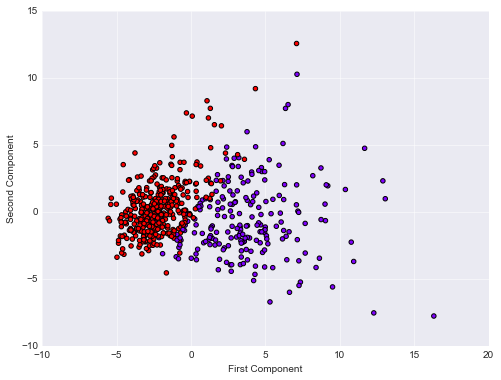

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='rainbow')
plt.xlabel('First Component')
plt.ylabel('Second Component')

First, let's evaluate the Logisitc Regression machine learning model on this data

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x_pca,cancer['target'],test_size=0.33)
# The target classification lies in the original data set

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rfc=RandomForestClassifier()

In [63]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
predictions = rfc.predict(X_test)

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 65   6]
 [ 10 107]]


             precision    recall  f1-score   support

          0       0.87      0.92      0.89        71
          1       0.95      0.91      0.93       117

avg / total       0.92      0.91      0.92       188



Let's see if the logistical regression model will be more or less accurate

Our data is already split, so we can skip this step

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr = LogisticRegression()

In [69]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
predictions_lr = lr.predict(X_test)

In [71]:
print(confusion_matrix(y_test,predictions_lr))
print('\n')
print(classification_report(y_test,predictions_lr))

[[ 70   1]
 [  5 112]]


             precision    recall  f1-score   support

          0       0.93      0.99      0.96        71
          1       0.99      0.96      0.97       117

avg / total       0.97      0.97      0.97       188



# What we've discovered is that the Logistic Regression model is better at predicting this model than the Random Forest